<a href="https://colab.research.google.com/github/DIVYAAZZ/SCT_DS_4/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cleaned.csv to cleaned.csv
Saving RTA Dataset.csv to RTA Dataset.csv
{'cleaned.csv': b'Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity\r\n18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2\r\n31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2\r\n18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1\r\n18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth

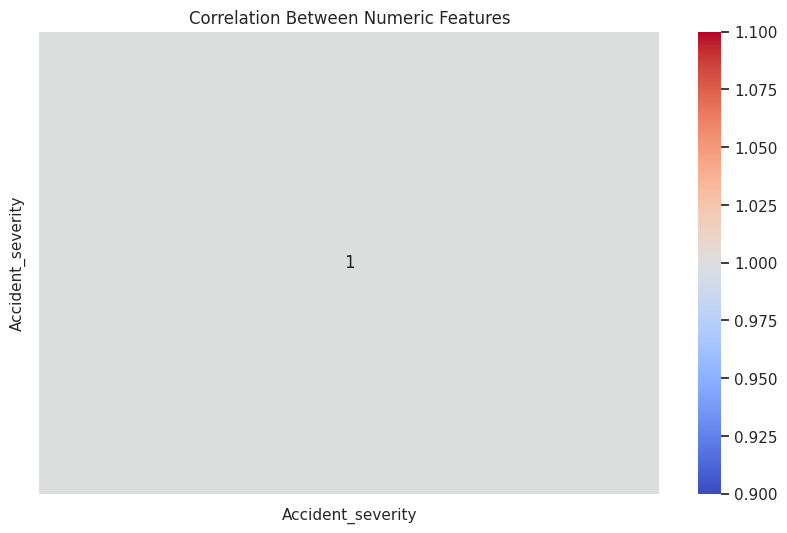

In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("cleaned.csv")
print("Dataset Loaded Successfully!")
print(df.head())

print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())

if 'Start_Time' in df.columns:
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    df['Hour'] = df['Start_Time'].dt.hour
    df['DayOfWeek'] = df['Start_Time'].dt.day_name()
    df['Month'] = df['Start_Time'].dt.month_name()
elif 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Hour'] = df['Date'].dt.hour
    df['DayOfWeek'] = df['Date'].dt.day_name()
    df['Month'] = df['Date'].dt.month_name()

if 'Hour' in df.columns:
    sns.countplot(x='Hour', data=df, palette='coolwarm')
    plt.title("Accidents by Hour of Day")
    plt.xlabel("Hour")
    plt.ylabel("Accident Count")
    plt.show()

if 'DayOfWeek' in df.columns:
    sns.countplot(x='DayOfWeek', data=df,
                  order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                  palette='Set2')
    plt.title("Accidents by Day of Week")
    plt.xlabel("Day")
    plt.ylabel("Accident Count")
    plt.show()

if 'Weather_Condition' in df.columns:
    top_weather = df['Weather_Condition'].value_counts().nlargest(10)
    sns.barplot(x=top_weather.index, y=top_weather.values, palette="viridis")
    plt.title("Top 10 Weather Conditions in Accidents")
    plt.xticks(rotation=45)
    plt.ylabel("Number of Accidents")
    plt.xlabel("Weather Condition")
    plt.show()

if 'Latitude' in df.columns and 'Longitude' in df.columns:
    sample = df.dropna(subset=['Latitude', 'Longitude']).sample(n=1000, random_state=42)
    fig = px.scatter_mapbox(sample,
                            lat="Latitude", lon="Longitude",
                            hover_name='City' if 'City' in df.columns else None,
                            color_discrete_sequence=["red"],
                            zoom=4, height=500)
    fig.update_layout(mapbox_style="carto-darkmatter")
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
    fig.show()
elif 'Start_Lat' in df.columns and 'Start_Lng' in df.columns:
    sample = df.dropna(subset=['Start_Lat', 'Start_Lng']).sample(n=1000, random_state=42)
    fig = px.scatter_mapbox(sample,
                            lat="Start_Lat", lon="Start_Lng",
                            hover_data=['City'] if 'City' in df.columns else None,
                            color_discrete_sequence=["red"],
                            zoom=4, height=500)
    fig.update_layout(mapbox_style="carto-darkmatter")
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
    fig.show()

corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()
